Flight Booking
Price Prediction

Problem Statement:
    The objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it.

Dataset Information:

Flight booking price prediction dataset contains around 3 lacs records
with 11 attributes .

In [37]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore') 

In [38]:
df=pd.read_csv('Flight_Booking.csv')

In [39]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [40]:
df.shape

(300153, 12)

In [41]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [42]:
df.rename(columns= {'Unnamed: 0': 'serial'}, inplace= True)

In [43]:
df

,serial,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [44]:
df.isnull().sum()

serial              0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [45]:
df.shape

(300153, 12)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   serial            300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [47]:
df.describe()

,serial,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [48]:
#Data Visualization

Text(0, 0.5, 'price')

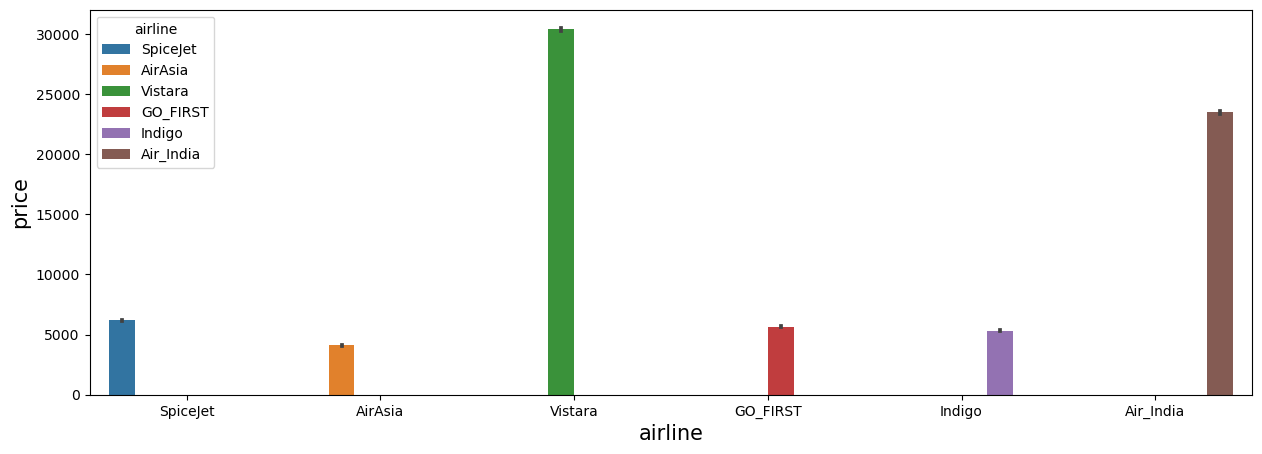

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['airline'], y=df['price'], hue= df['airline'])
plt.xlabel('airline', fontsize=15)
plt.ylabel('price', fontsize=15)

There is a variation in price with different airlines

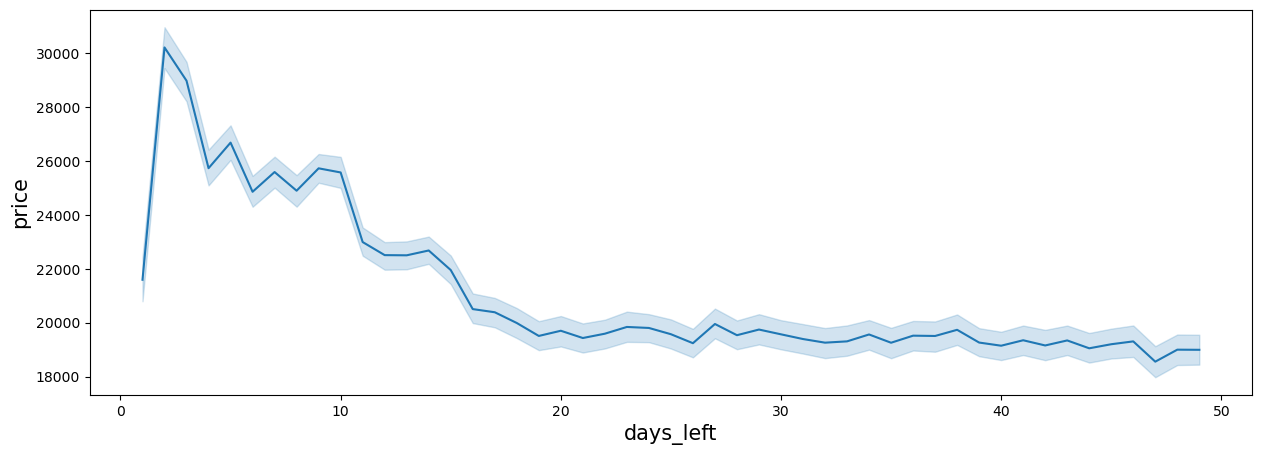

In [50]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'], y=df['price'])
plt.xlabel('days_left', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

The price of the ticket increases as the days left for departure decreases

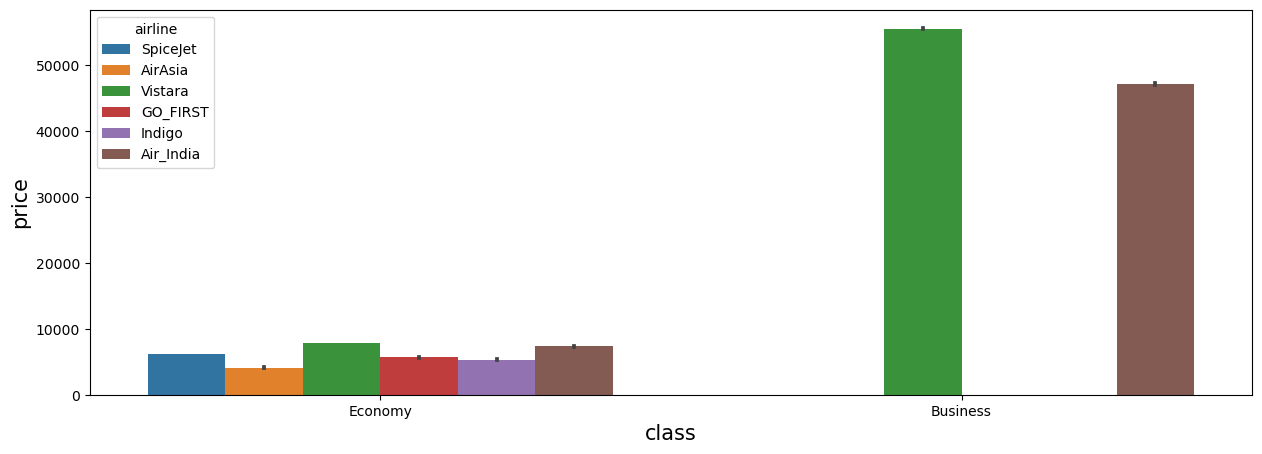

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['price'], x=df['class'], hue= df['airline'])
plt.xlabel('class', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

Range of price of all the flights of Economy and Business class

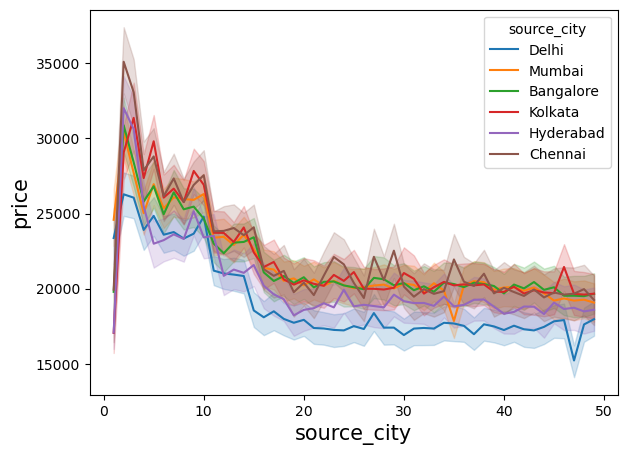

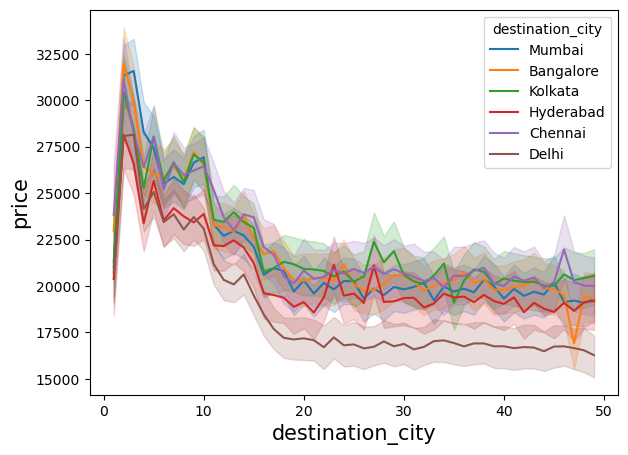

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=df['days_left'], y=df['price'], hue= df['source_city'])
plt.xlabel('source_city', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.lineplot(x=df['days_left'], y=df['price'], hue= df['destination_city'])
plt.xlabel('destination_city', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

Range of price of flights with source and destination city according to the days left

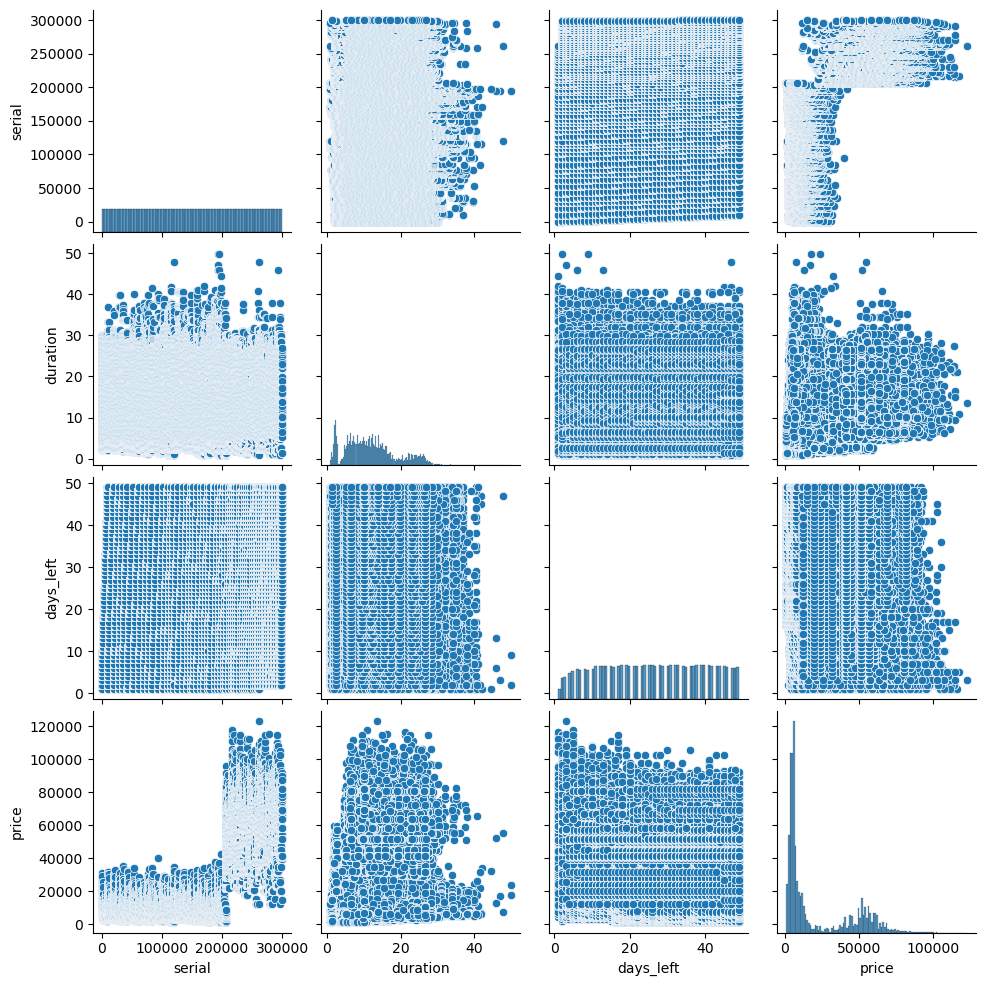

In [53]:
sns.pairplot(df)

<Axes: >

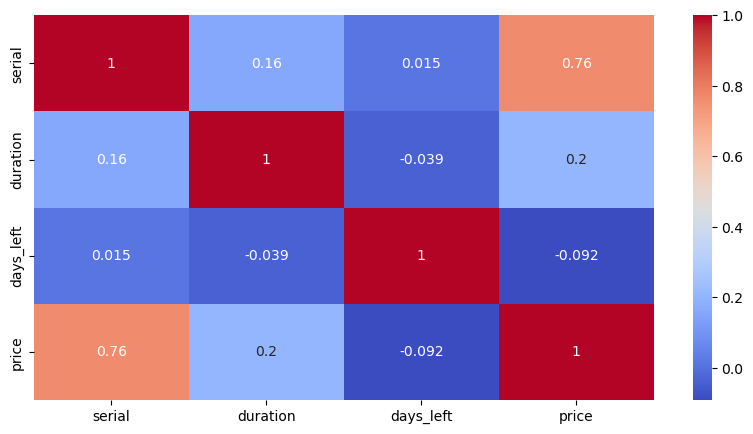

In [54]:
#Plotting the correlation graph to see the correlation between features and dependent variable.
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')

In [55]:
#Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'O':
        df[i] = le.fit_transform(df[i])

In [66]:
df

,serial,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [22]:
#Feature Selection

In [67]:
X=df.drop('price', axis=1)
X

,serial,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,4,1408,2,2,2,5,5,1,2.17,1
1,1,4,1387,2,1,2,4,5,1,2.33,1
2,2,0,1213,2,1,2,1,5,1,2.17,1
3,3,5,1559,2,4,2,0,5,1,2.25,1
4,4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,1477,1,4,0,2,3,0,10.08,49
300149,300149,5,1481,1,0,0,5,3,0,10.42,49
300150,300150,5,1486,1,1,0,5,3,0,13.83,49
300151,300151,5,1483,1,1,0,2,3,0,10.00,49


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print or use the 'vif' DataFrame as needed
print(vif)

             Feature        VIF
0             serial   6.594684
1            airline   6.808848
2             flight  13.019774
3        source_city   3.010180
4     departure_time   2.919893
5              stops   1.465700
6       arrival_time   3.980668
7   destination_city   3.126129
8              class   4.537624
9           duration   5.170300
10         days_left   4.427888


Selecting the features using VIF. VIF should be less than 5. So drop the stops feature.

In [70]:
X.drop('flight', axis=1, inplace=True)

In [71]:
vif= pd.DataFrame()
vif['Feature']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range (len(X.columns))]
vif

,Feature,VIF
0,serial,6.420074
1,airline,3.776008
2,source_city,2.981667
3,departure_time,2.908666
4,stops,1.460119
5,arrival_time,3.922821
6,destination_city,3.114813
7,class,4.512035
8,duration,4.701263
9,days_left,4.385177


In [72]:
X.drop('serial', axis=1, inplace=True)

In [73]:
vif= pd.DataFrame()
vif['Feature']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range (len(X.columns))]
vif

,Feature,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [74]:
X.shape

(300153, 9)

In [75]:
y= df.price
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

### Linear Regression

In [76]:
#Applying standardization and implementing Linear Regression Model to predict the price of a flight.

In [77]:
#feature selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [79]:
y_pred=lin_reg.predict(X_test)
y_pred

array([ 4582.69078161, 52858.86295317,  7883.42638552, ...,
       -1897.26871277,  6032.94399587, -3472.23525258])

In [80]:
error= pd.DataFrame()

In [81]:
y_test

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
          ...  
123895     6134
251253    67004
8335       2410
68668      2835
108970     3393
Name: price, Length: 90046, dtype: int64

In [82]:
diff= y_test-y_pred
diff

27131      2783.309218
266857    11972.137047
141228    -1688.426386
288329     4013.096784
97334       -76.398173
              ...     
123895     -705.263993
251253    12724.547016
8335       4307.268713
68668     -3197.943996
108970     6865.235253
Name: price, Length: 90046, dtype: float64

In [83]:
error['actual']= y_test
error['predicted']=y_pred
error['diff']= diff

In [84]:
error

,actual,predicted,diff
27131,7366,4582.690782,2783.309218
266857,64831,52858.862953,11972.137047
141228,6195,7883.426386,-1688.426386
288329,60160,56146.903216,4013.096784
97334,6578,6654.398173,-76.398173
...,...,...,...
123895,6134,6839.263993,-705.263993
251253,67004,54279.452984,12724.547016
8335,2410,-1897.268713,4307.268713
68668,2835,6032.943996,-3197.943996


In [85]:
#Calculating r2 score,MAE, MAPE,MSE, RMSE. 

In [86]:
from sklearn.metrics import *

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

mse= mean_squared_error(y_test, y_pred)
print(mse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape*100)

mae=mean_absolute_error(y_test, y_pred)
print(mae)

print(r2_score(y_test, y_pred))

7005.095692737863
49071365.664414555
43.75237168218601
4626.099183664053
0.9046540517018563


Root Mean square error(RMSE) of the Linear regression model is 7004.69 and Mean absolute percentage 
error(MAPE) is 43 percent. Lower the RMSE and MAPE better the model.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


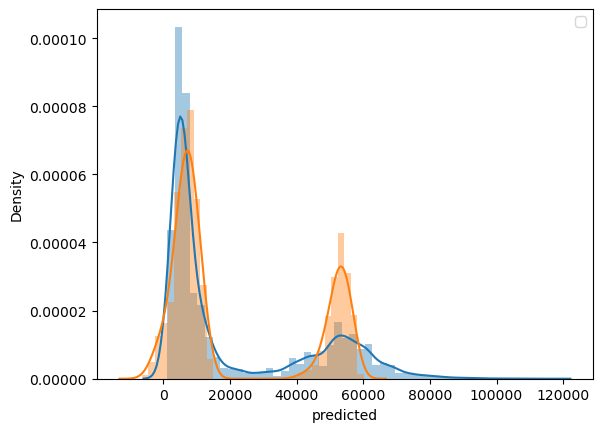

In [87]:
#Plotting the graph of actual and predicted price of flight
sns.distplot(error['actual'])
sns.distplot(error['predicted'])
plt.legend()

### Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr=dtr.predict(X_test)

In [89]:
from sklearn.metrics import *

rmse = mean_squared_error(y_test, y_pred_dtr, squared=False)
print(rmse)

mse= mean_squared_error(y_test, y_pred_dtr)
print(mse)

mape = mean_absolute_percentage_error(y_test, y_pred_dtr)
print(mape*100)

mae=mean_absolute_error(y_test, y_pred_dtr)
print(mae)

print(r2_score(y_test, y_pred_dtr))

3569.038812019927
12738038.041704612
7.608454159670491
1191.0584367989695
0.9752499181528812


Mean absolute percentage error is 7.6 percent and RMSE is 3569 which is less than the linear regression model

### Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import *

rmse = mean_squared_error(y_test, y_pred_rfr, squared=False)
print(rmse)

mse= mean_squared_error(y_test, y_pred_rfr)
print(mse)

mape = mean_absolute_percentage_error(y_test, y_pred_rfr)
print(mape*100)

mae=mean_absolute_error(y_test, y_pred_rfr)
print(mae)

print(r2_score(y_test, y_pred_rfr))

Mean absolute percentage error is 7.3 percent and RMSE is 2824 which is less than the linear regression and decision tree model